# Predictive Analytics - Subsmission Machine Learning Terapan

Nama: Irfan Saputra Nasution
Asal: Pekanbaru, Riau

Predictive analytics merupakan bidang terapan yang menggunakan berbagai metode kuantitatif untuk membuat prediksi dengan memanfaatkan data. Disini saya sendiri akan melakukan predictive analytics Banana Quality dimana saya memprediksi seberapa kualitas pisang berdasarkan data yang tersedia.


# Businesss Understanding
## Problem Statements


1.   Bagaimana kita memprediksi kualitas sebuah pisang dari sebuah data yang sudah ada?

## Goals
Dapat membantu sebuah prediksi kualitas pisang yang akurat berdasarkan variabel-variabel yang tersedia





# 1. Necessary Libraries
Disini kita mengumpulkan berbagai library python yang akan digunakan sepanjang memprediksi analytics.

In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## 1.1 Import Data
Disini kita akan mengimpor data. Data sendiri saya ambil dari sebuah website Kaggle

Berikut adalah linknya:
https://www.kaggle.com/datasets/l3llff/banana



In [3]:
banana = pd.read_csv("/content/banana_quality.csv")
banana.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Dapat terlihat bahwa data dari Kualitas Pisang ini terdiri dari 8 kolom (variabel)

In [4]:
banana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


Setelah melakukan eksekusi banana.info() maka terlihat dari jumlah data, berapa variabel, dan tipe data.

Variabel: 8 Buah
Jumlah Data: 8000 data
Tipe Data: 7 tipe data float64 dan 1 tipe data object

## 1.2 Checking Duplicated
Kita akan melakukan pengecekan duplikat disetiap variabelnya dengan cara

```
# banana.duplicated.sum()
```



In [5]:
banana.duplicated().sum()

0

Terlihat bahwa data tersedia tidak memiliki data yang duplikat. Jadi aman digunakan

## 1.3 Checking Null
Setelah pengecekan data duplikat, kita akan mengecek jumlah kolom/baris yang kosong di sebuah data


```
# banana.isnull().sum()
```



In [6]:
banana.isnull().sum()

,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


Terlihat bahwa, setiap variabel tidak memiliki data yang kosong. Jadi aman digunakan

## 1.4 Checking Data Describe
Selanjutnya kita akan mengecek deskripsi statistik data dengan cara:


```
# banana.describe()
```



In [7]:
banana.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

# 2. Distribution of target Variabel
Disini kita akan mengecek, distribusi dari sebuah variabel masing-masing

Quality
Good    4006
Bad     3994
Name: count, dtype: int64


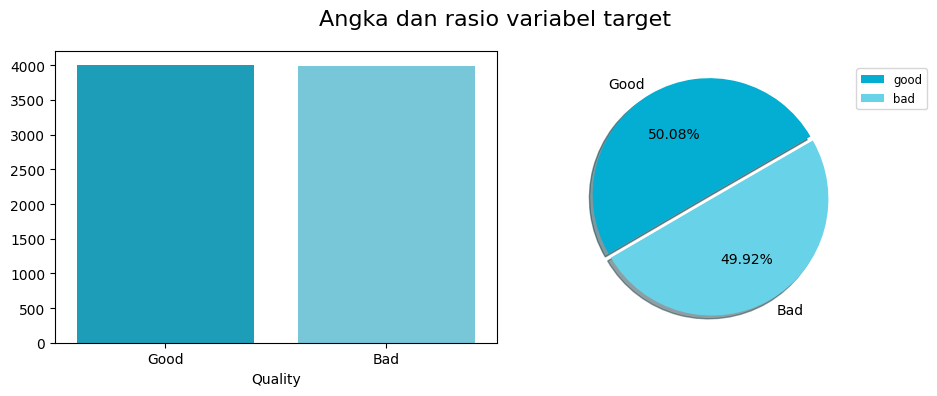

In [8]:
plt.figure(figsize=(10,4))
cols = ["#03AED2", "#68D2E8"]
plt.subplot(1,2,1)
sns.barplot(x=banana["Quality"].value_counts().index, y=banana["Quality"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=banana["Quality"].value_counts(), labels=banana["Quality"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.2f%%', colors=cols)
plt.legend(labels=["good", "bad"], loc=(1,0.8), fontsize="small")
plt.suptitle("Angka dan rasio variabel target", fontsize=16)
plt.tight_layout()
print(banana.Quality.value_counts())
plt.show()

# Distribution of Numerical Variabel
Sama seperti halnya Disribution of Categorical Variabel. Distribution of Numerical Variabel juga kita akan mengecek seberapa besar distribusi dalam variabel numerik

In [9]:
num_cols = banana.select_dtypes(include=["float64"]).columns

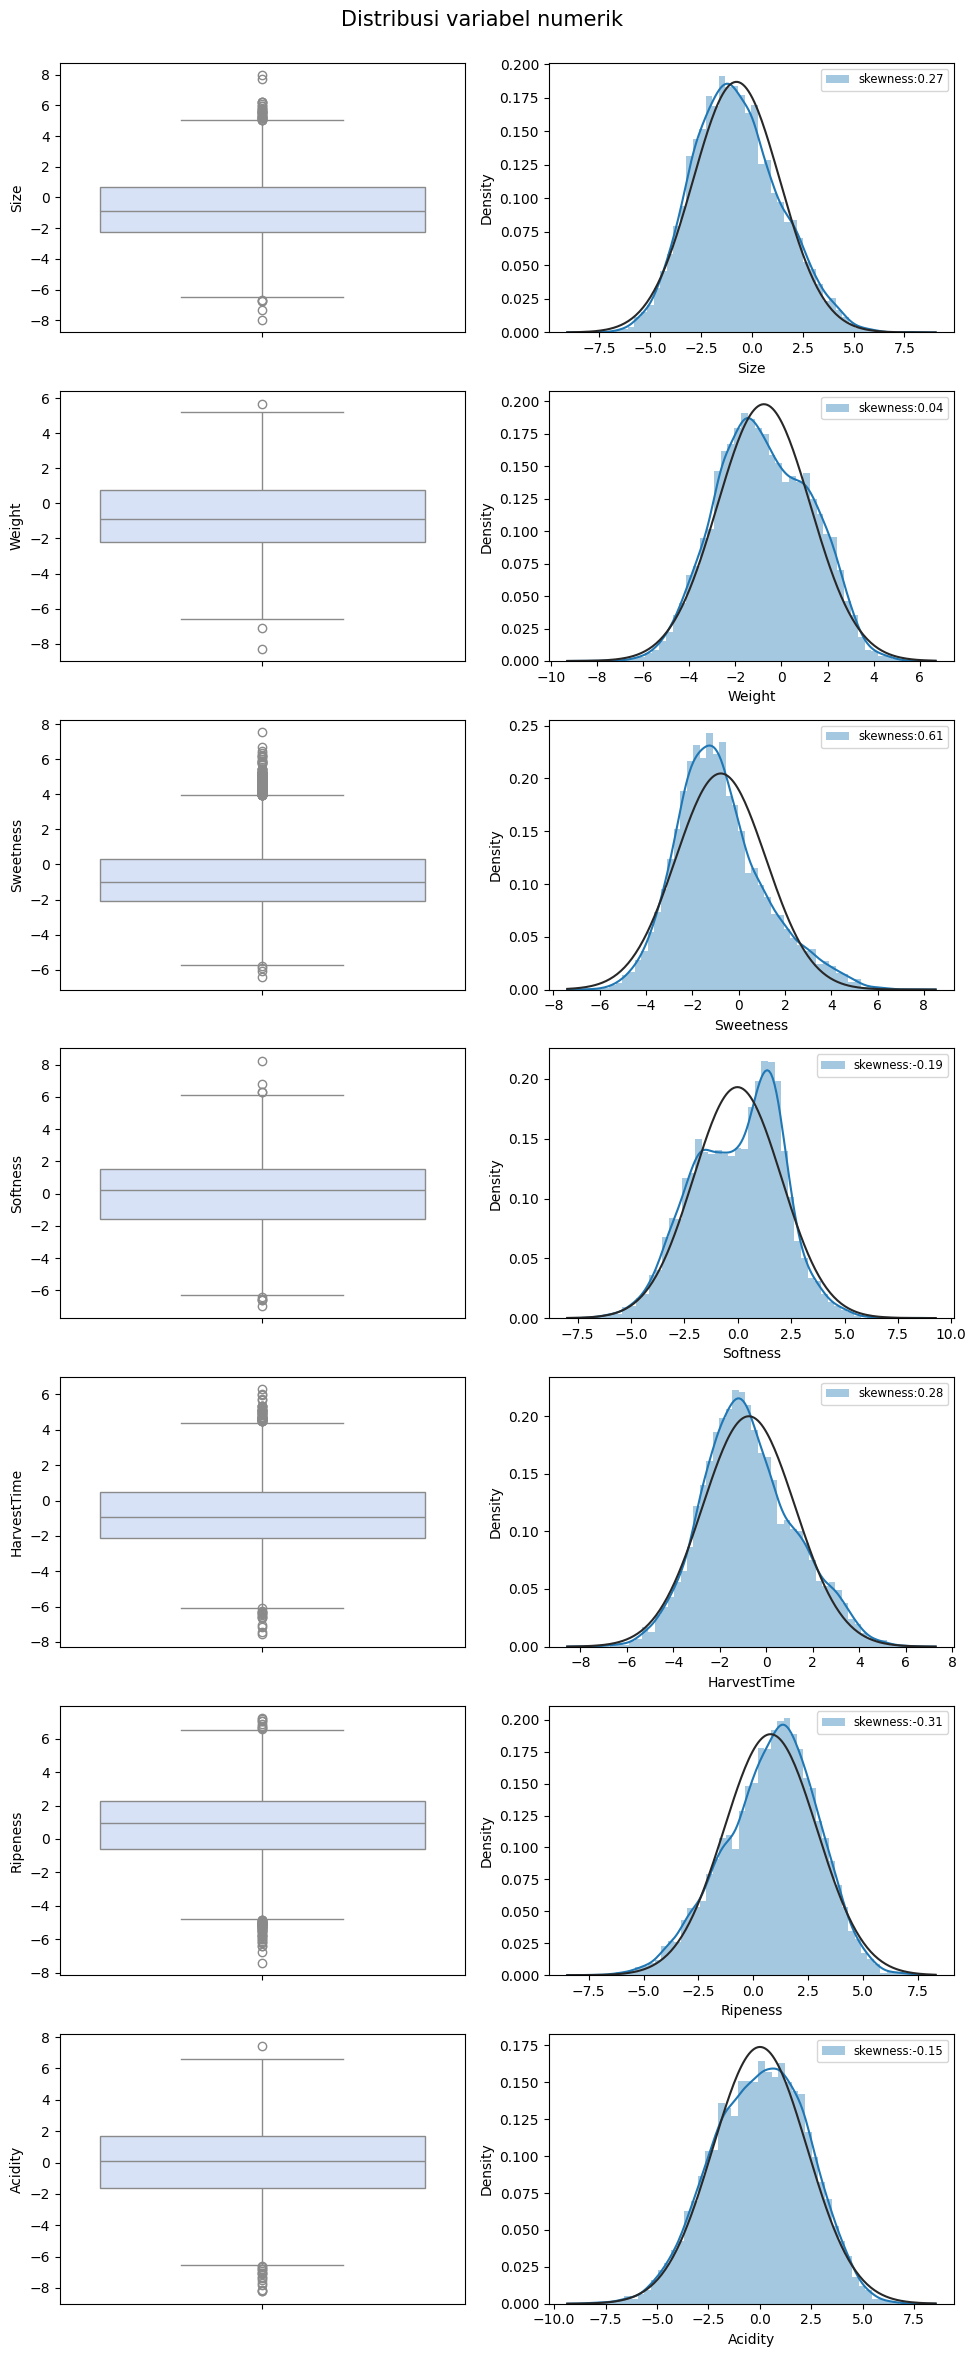

In [10]:
plt.figure(figsize=(10,24))
j = 1
for i in num_cols:
    plt.subplot(7,2, j)
    sns.boxplot(banana[i], color="#D2E0FB")
    plt.subplot(7,2, j+1)
    sns.distplot(banana[i], label=f"skewness:{banana[i].skew():.2f}", fit=norm)
    j = j +2
    plt.legend(fontsize="small")
    plt.suptitle("Distribusi variabel numerik\n\n", fontsize=15)
plt.tight_layout()
plt.show()

# 4. Outliers
Setelah melakukan pengecekan distribusi, kita akan melakukan pengecekan outlier dan membersihkan outlier secara langsung.

In [11]:
def clean_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    data = data[~((data[column] > upper_limit) | (data[column] < lower_limit))]
    return data

for i in num_cols:
    banana = clean_outliers(banana, i)

# 5. Correlation beetween Features
Disini akan melakukan korelasi fitur "Quality" dengan fitur Numerik. Kenapa harus korelasi? karena kita akan mengukur kekuatan hubungan anntara dua variabel serta arahnya (positif atau negatif)

In [12]:
banana["Quality"] = banana["Quality"].map({"Good":1, "Bad":0})

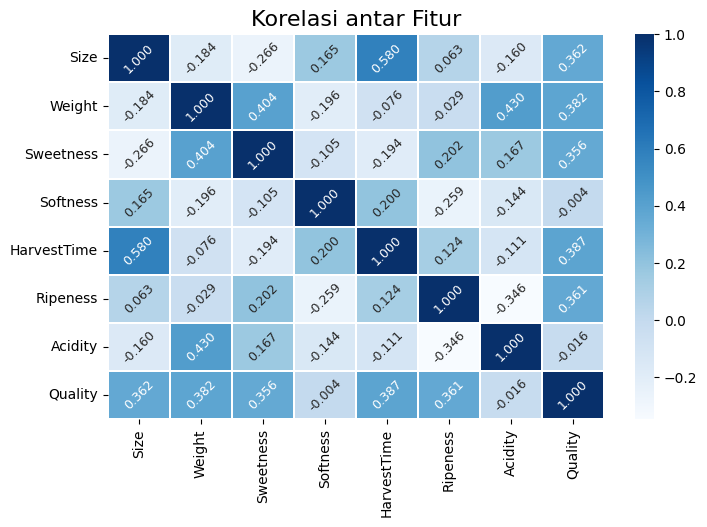

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(banana.corr(), linewidths=0.05, annot=True,
            annot_kws={'size': 9, 'rotation': 45}, fmt='.3f', cmap="Blues")
plt.xticks(fontsize=10), plt.yticks(fontsize=10)
plt.title("Korelasi antar Fitur", fontsize=16)
plt.show()

# 6. Standaritation
Hal ini mungkin tidak dapat dilakukan karena nilai variansnya tidak tinggi.


In [14]:
scaler = StandardScaler()
banana.iloc[:,:-1] = scaler.fit_transform(banana.iloc[:,:-1])

# 7. Train-Test Split
Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Kita perlu mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru

In [15]:
y = banana["Quality"]
X = banana.drop(["Quality"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 7657
Total # of sample in train dataset: 5359
Total # of sample in test dataset: 2298


# 8. Comparison of Models
Disini kita akan membandingkan akurasi dari berbagai algoritma model machine learning

In [17]:
model_list = [RandomForestClassifier(), LogisticRegression(), SVC(), MLPClassifier(), CatBoostClassifier(verbose=False),
             AdaBoostClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(),
             XGBClassifier(), XGBRFClassifier()]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    model_name_list.append(model_name)
    model_accuracies.append(accuracy)

    print(f"{model_name} accuracy: {accuracy:.4f}\n")

RandomForestClassifier accuracy: 0.9782

LogisticRegression accuracy: 0.8777

SVC accuracy: 0.9830

MLPClassifier accuracy: 0.9826

CatBoostClassifier accuracy: 0.9809

AdaBoostClassifier accuracy: 0.8908

ExtraTreesClassifier accuracy: 0.9817

GradientBoostingClassifier accuracy: 0.9643

HistGradientBoostingClassifier accuracy: 0.9756

XGBClassifier accuracy: 0.9752

XGBRFClassifier accuracy: 0.9504



# 9. Evaluation Models

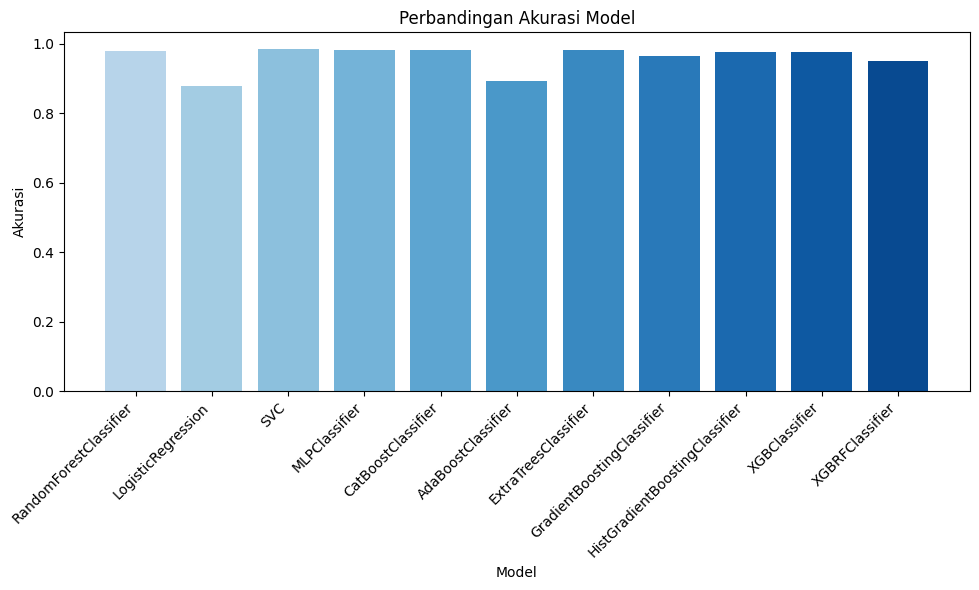

In [18]:
# Generating a list of blue colors from dark to light
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(model_name_list)))

# Plotting the accuracies with blue colors from dark to light
plt.figure(figsize=(10, 6))
plt.bar(model_name_list, model_accuracies, color=colors)
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()